# LSTM(Long Short-Term Memory) 구조

<img src = "./image/rnn_lstm.jpg" width = "500" height = "500">

- 단기 기억을 오래 기억하기 위해 고안되었음

<img src = "./image/lstm.png" width = "700" height = "700">

- 은닉 상태를 만드는 방법
    - output gate layer(출력 게이트)
        1. 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만듦
            - 이 때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용
          
        2. tanh 활성화 함수를 통과한 값과 곱해져서 은닉 상태를 만듦
     
- LSTM은 순환되는 상태가 2개
    - 은닉 상태
    - 셀 상태(cell state)
        - 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값
     
- 셀 상태를 계산하는 과정
    - forget gate layer(삭제 게이트)
        - 정보를 제거하는 역할
        1. 입력과 은닉 상태를 또 다른 가중치에 곱한 다음 시그모이드 함수를 통과
     
        2. 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만듦
            - 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여
          
    - input gate layer(입력 게이트)
        - 새로운 정보를 셀 상태에 추가
        1. 입력과 은닉 상태를 각기 다른 가중치에 곱함
        2. 하나는 시그모이드 함수, 하나는 tanh 함수를 통과
        3. 두 결과를 곱함
        4. 이전 셀 상태와 더함

## 데이터 준비

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 500)

In [3]:
# 훈련 세트와 검증 세트 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                  stratify = y_train, random_state = 26)

In [4]:
# 패딩
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen = 100)

In [5]:
# LSTM 모델 생성
model = keras.Sequential()
model.add(keras.Input(shape = (100,)))
model.add(keras.layers.Embedding(500, 32))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 32)             │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 8)                   │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,321 (67.66 KB)

 Trainable params: 17,321 (67.66 KB)

 Non-trainable params: 0 (0.00 B)

- LSTM 셀 파라미터 개수
    - ((8 * 8) + (32 * 8) + 8) * 4 = 1312

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
cp_cb = keras.callbacks.ModelCheckpoint("./model/best-lstm-model.keras", save_best_only = True)
es_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [9]:
history = model.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val), callbacks = [cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5231 - loss: 0.6926 - val_accuracy: 0.5698 - val_loss: 0.6898
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5834 - loss: 0.6885 - val_accuracy: 0.6204 - val_loss: 0.6828
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6329 - loss: 0.6777 - val_accuracy: 0.6474 - val_loss: 0.6536
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6919 - loss: 0.6301 - val_accuracy: 0.7102 - val_loss: 0.5877
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7410 - loss: 0.5678 - val_accuracy: 0.7404 - val_loss: 0.5579
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7581 - loss: 0.5428 - val_accuracy: 0.7552 - val_loss: 0.5364
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7694 - loss: 0.5190 - val_accuracy: 0.7616 - val_loss: 0.5187
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7829 - loss: 0.4992 - 

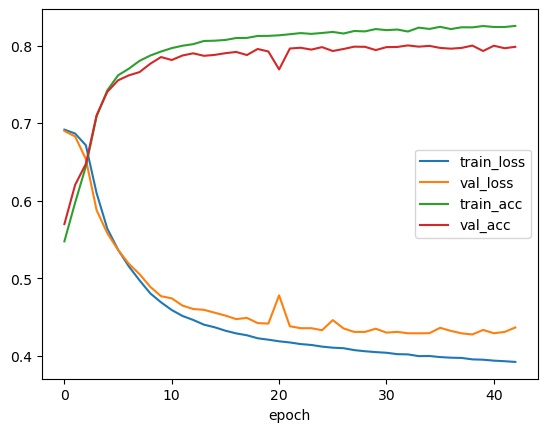

In [10]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# 순환층에 드롭아웃 적용

- 순환층은 자체적으로 드롭아웃 기능을 제공
    - SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있음
        - dropout : 셀의 입력에 드롭아웃을 적용
        - recurrent_dropout : 순환되는 은닉 상태에 드롭아웃을 적용
            - 버전에 따라 recurrent_dropout이 GPU 를 사용하지 못하는 경우가 있음

In [11]:
model2 = keras.Sequential()
model2.add(keras.Input(shape = (100,)))
model2.add(keras.layers.Embedding(500, 32))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
cp_cb = keras.callbacks.ModelCheckpoint("./model/best-dropout-model.keras", save_best_only = True)
es_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [13]:
history = model2.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, y_val), callbacks = [cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.5168 - loss: 0.6928 - val_accuracy: 0.5714 - val_loss: 0.6915
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5786 - loss: 0.6907 - val_accuracy: 0.6158 - val_loss: 0.6886
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6135 - loss: 0.6869 - val_accuracy: 0.6504 - val_loss: 0.6808
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6468 - loss: 0.6752 - val_accuracy: 0.6956 - val_loss: 0.6455
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6976 - loss: 0.6302 - val_accuracy: 0.7170 - val_loss: 0.5945
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7202 - loss: 0.5886 - val_accuracy: 0.7358 - val_loss: 0.5714
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7454 - loss: 0.5614 - val_accuracy: 0.7478 - val_loss: 0.5534
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7577 - loss: 0.5420 -

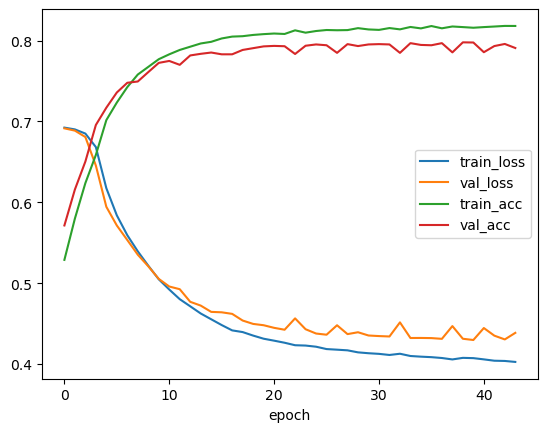

In [14]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# 2개의 층을 연결

- 순환층을 연결할 때의 주의점
    - 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달
        - 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함
     
        - 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야함
            - return_sequences 매개변수를 True로 지정

In [15]:
model3 = keras.Sequential()
model3.add(keras.Input(shape = (100,)))
model3.add(keras.layers.Embedding(500, 32))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = "sigmoid"))

In [16]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 32)             │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 8)              │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,865 (69.79 KB)

 Trainable params: 17,865 (69.79 KB)

 Non-trainable params: 0 (0.00 B)

- 첫 번째 LSTM
    - 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에 출력의 크기가 (None, 100, 8)
 
- 두 번째 LSTM
    - 마지막 타임스텝의 은닉 상태만 출력하기 때문에 출력의 크기가 (None, 8)

In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
cp_cb = keras.callbacks.ModelCheckpoint("./model/best-2rnn-model.keras", save_best_only = True)
es_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [18]:
history = model3.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, y_val), callbacks = [cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.5188 - loss: 0.6926 - val_accuracy: 0.5844 - val_loss: 0.6897
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.5911 - loss: 0.6865 - val_accuracy: 0.6792 - val_loss: 0.6580
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.6534 - loss: 0.6499 - val_accuracy: 0.6910 - val_loss: 0.6112
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.6948 - loss: 0.6075 - val_accuracy: 0.7318 - val_loss: 0.5718
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7301 - loss: 0.5658 - val_accuracy: 0.7404 - val_loss: 0.5398
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7461 - loss: 0.5368 - val_accuracy: 0.7582 - val_loss: 0.5136
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7607 - loss: 0.5173 - val_accuracy: 0.7640 - val_loss: 0.5004
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7652 - loss: 0

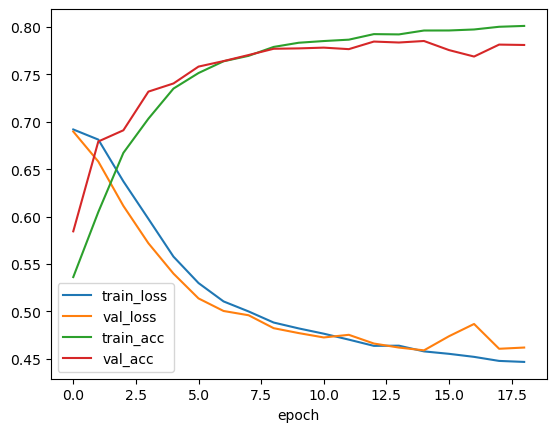

In [19]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# GRU(Grated Recurrent Unit) 구조

<img src = "./image/rnn_lstm_gru.png">

- LSTM을 간소화한 버전

- LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함

- LSTM보다 가중치가 적기 때문에 계산량이 적지만 성능은 LSTM과 유사함
    - 데이터 양이 적을 때는 GRU의 성능이 더 좋고 데이터 양이 많을 때는 LSTM의 성능이 더 좋아지는 경향이 있음
    - GRU와 LSTM 중 어떤 것이 더 낫다라고 말할 수는 없음

<img src = "./image/gru.png" height = "500" width = "500">

- GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀 3개가 들어 있음
    - 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용
 
- reset_gate
    - 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할을 수행
 
- update_gate
    - 어떤 정보를 얼마만큼 유지하고 어떤 정보를 추가할지 결정하는 역할

In [20]:
model4 = keras.Sequential()
model4.add(keras.Input(shape = (100,)))
model4.add(keras.layers.Embedding(500, 32))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = "sigmoid"))

In [21]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 32)             │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │           1,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,017 (66.47 KB)

 Trainable params: 17,017 (66.47 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
((8 * 8) + (32 * 8) + 8 + 8) * 3

1008

In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
cp_cb = keras.callbacks.ModelCheckpoint("./model/best-gru-model.keras", save_best_only = True)
es_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [25]:
history = model4.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, y_val), callbacks = [cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.5087 - loss: 0.6928 - val_accuracy: 0.5582 - val_loss: 0.6908
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5619 - loss: 0.6897 - val_accuracy: 0.5718 - val_loss: 0.6876
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5873 - loss: 0.6855 - val_accuracy: 0.5854 - val_loss: 0.6828
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6070 - loss: 0.6792 - val_accuracy: 0.5932 - val_loss: 0.6759
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.6149 - loss: 0.6705 - val_accuracy: 0.6046 - val_loss: 0.6662
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6264 - loss: 0.6588 - val_accuracy: 0.6260 - val_loss: 0.6519
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6526 - loss: 0.6412 - val_accuracy: 0.6536 - val_loss: 0.6297
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6847 - loss: 0.6109 -

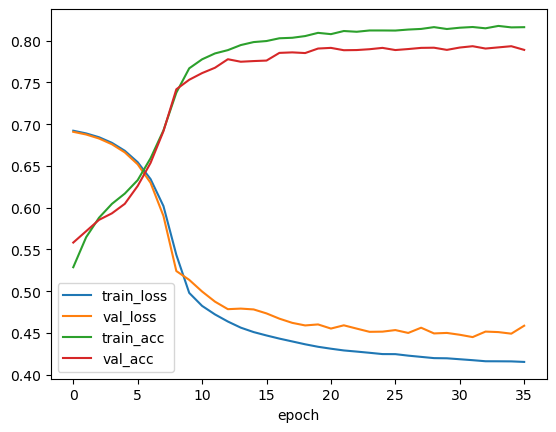

In [26]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# best model 검증

In [27]:
test_seq = pad_sequences(x_test, maxlen = 100)

In [28]:
best_model = keras.models.load_model("./model/best-lstm-model.keras")

In [29]:
best_model.evaluate(test_seq, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8039 - loss: 0.4225


[0.42262983322143555, 0.8036800026893616]